PontoQuadridimensional(-250919762.30527496, -629734142.3227607, -476588632.52818805, -4516698679.917208)
PontoQuadridimensional(901428612.8198323, 83801894.75671625, -506042401.85600036, -2805796718.759062)
PontoQuadridimensional(463987883.6228101, 745891671.7528167, 812509161.0420735, -10343542996.663513)
PontoQuadridimensional(197316968.39407325, 464449772.8191223, -500907600.3009878, -5176737425.423414)
PontoQuadridimensional(-687962719.115127, 613122295.7228994, -456100547.742738, -5909905432.616268)
PontoQuadridimensional(-688010959.3275948, 317566733.42143464, 518796524.8359275, -2306940800.3218594)
PontoQuadridimensional(-883832775.663601, 384553129.03570485, -100520315.09891999, -1295998565.3586044)
PontoQuadridimensional(732352291.5498703, 698391303.1306386, 553421113.9103625, -13632236553.612062)
PontoQuadridimensional(202230023.48641753, -500663982.28162813, -869267684.8712295, -4498525116.988661)
PontoQuadridimensional(416145155.5920911, -21150072.71371901, -24857612.653231

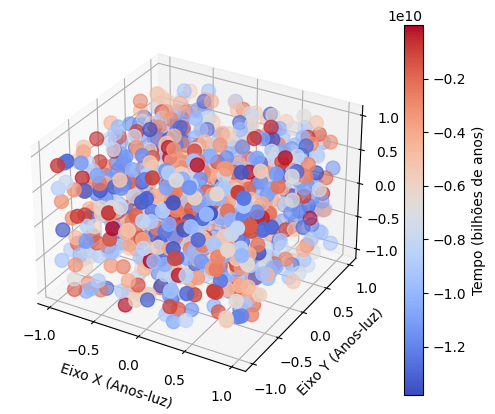

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class PontoQuadridimensional:
    """
    Classe que representa um ponto em um espaço quadridimensional.
    """
    def __init__(self, x, y, z, t):
        """
        x, y, z: Coordenadas espaciais (Representando o espaço tridimensional).
        t: Coordenada temporal (Representando o passado, presente e futuro).
        """
        self.x = np.float64(x)  # Utilizando precisão do NumPy
        self.y = np.float64(y)  # para coordenadas espaciais
        self.z = np.float64(z)
        self.t = np.float64(t)  # Coordenada temporal

    def __repr__(self):
        return f"PontoQuadridimensional({self.x}, {self.y}, {self.z}, {self.t})"


class CuboUniverso:
    """
    Classe que representa um cubo em um espaço tridimensional.
    """
    def __init__(self, limite_espacial, limite_temporal):
        """
        limite_espacial: Tupla com os limites espaciais (x_min, x_max, y_min, y_max, z_min, z_max).
        limite_temporal: Tupla com os limites temporais (t_min, t_max).
        """
        self.limite_espacial = np.array(limite_espacial, dtype=np.float64)
        self.limite_temporal = np.array(limite_temporal, dtype=np.float64)
        self.pontos = []  # Lista para armazenar os pontos quadridimensionais no cubo.

    def __repr__(self):
        return f"CuboUniverso({self.limite_espacial}, {self.limite_temporal})"

    def add_ponto(self, ponto):
        """
        Adiciona um ponto quadridimensional no cubo, caso esteja dentro dos limites.
        """
        if (self.limite_espacial[0] <= ponto.x <= self.limite_espacial[1] and
            self.limite_espacial[2] <= ponto.y <= self.limite_espacial[3] and
            self.limite_espacial[4] <= ponto.z <= self.limite_espacial[5] and
            self.limite_temporal[0] <= ponto.t <= self.limite_temporal[1]):
            self.pontos.append(ponto)
        else:
            print("Ponto fora dos limites do cubo espaço-tempo.")

    def remove_ponto(self, ponto):
        """
        Remove um ponto quadridimensional do cubo.
        """
        self.pontos.remove(ponto)

    def mostrar_pontos(self):
        """
        Mostra todos os pontos quadridimensionais no cubo.
        """
        for ponto in self.pontos:
            print(ponto)

    def visualizar_cubo(self):
        """
        Função que visualiza os pontos quadridimensionais no cubo em 3D.
        O tempo (t) será representado pela cor dos pontos.
        """
        if not self.pontos:
            print("Nenhum ponto para exibir.")
            return

        # Extraindo coordenadas e tempos para plotar
        xs = [p.x for p in self.pontos]
        ys = [p.y for p in self.pontos]
        zs = [p.z for p in self.pontos]
        tempos = [p.t for p in self.pontos]  # O tempo é mapeado em cores

        # Criando o gráfico 3D
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Usar a coordenada temporal para colorir os pontos
        scatter = ax.scatter(xs, ys, zs, c=tempos, cmap='coolwarm', s=100)  # s é o tamanho dos pontos

        # Adicionando uma barra de cores para mostrar o valor de tempo
        cbar = plt.colorbar(scatter)
        cbar.set_label('Tempo (bilhões de anos)')

        # Definindo os rótulos dos eixos
        ax.set_xlabel('Eixo X (Anos-luz)')
        ax.set_ylabel('Eixo Y (Anos-luz)')
        ax.set_zlabel('Eixo Z (Anos-luz)')

        # Exibindo o gráfico
        plt.show()

# Exemplo de uso:
if __name__ == "__main__":
    # Definindo limites em escala astronômica (anos-luz e bilhões de anos)
    # Limite espacial: -1 bilhão a 1 bilhão de anos-luz em cada direção
    # Limite temporal: -13.8 bilhões de anos (passado, Big Bang) a 0 (presente)
    limite_espacial = (-1e9, 1e9, -1e9, 1e9, -1e9, 1e9)
    limite_temporal = (-13.8e9, 0)

    # Criando o cubo do universo
    cubo = CuboUniverso(limite_espacial, limite_temporal)

    # Simulando um conjunto de pontos (eventos) desde o Big Bang até o presente
    n_pontos = 1000  # Número de eventos para simular
    np.random.seed(42)  # Para consistência de resultados

    # Gerando coordenadas espaciais aleatórias dentro dos limites
    xs = np.random.uniform(limite_espacial[0], limite_espacial[1], n_pontos)
    ys = np.random.uniform(limite_espacial[2], limite_espacial[3], n_pontos)
    zs = np.random.uniform(limite_espacial[4], limite_espacial[5], n_pontos)

    # Gerando coordenadas temporais aleatórias dentro dos limites (desde o Big Bang até o presente)
    ts = np.random.uniform(limite_temporal[0], limite_temporal[1], n_pontos)

    # Adicionando os pontos ao cubo
    for i in range(n_pontos):
        ponto = PontoQuadridimensional(xs[i], ys[i], zs[i], ts[i])
        cubo.add_ponto(ponto)

    # Exibindo os pontos
    cubo.mostrar_pontos()

    # Visualizando o cubo com os eventos
    cubo.visualizar_cubo()